## Importações e Informações do dataset

In [6]:
# Importações necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregamento dos dados
file_path = '/content/drive/MyDrive/covid_data.csv'
data = pd.read_csv(file_path)

# Visualização dos dados
print("Primeiros registros do dataset:\n")
data.head()

Primeiros registros do dataset:



,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Pré-processamento

In [7]:
# Tratamento de valores faltantes (se necessário)
data = data.dropna()

# Manter a coluna de rótulos separadamente
labels = data['CLASIFFICATION_FINAL']

# Remoção de atributos quantitativos
qualitative_columns = data.select_dtypes(include=['object']).columns

# Transformação de atributos categóricos para numéricos usando LabelEncoder
label_encoders = {}
for column in qualitative_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Adicionando a coluna de rótulos de volta
data['CLASIFFICATION_FINAL'] = labels

# Amostragem do dataset para evitar estouro de memória
data_sampled = data.sample(n=10000, random_state=42)  # Ajuste o valor conforme necessário

# Separação entre atributos (X) e rótulos (y)
X = data_sampled.drop(columns=['CLASIFFICATION_FINAL'])
y = data_sampled['CLASIFFICATION_FINAL']

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Categorical Naive Bayes (padrão)


Matriz de Confusão:


[[  0   0   4   0   0   0  12]
 [  0   0   6   0   0   0   0]
 [  0   0 227   0   2   0 455]
 [  0   0   0   0   0   0   4]
 [  0   0  16   0   1   1  49]
 [  0   0  43   0   0   4 194]
 [  0   0 143   0   3   0 836]]

Relatório de Classificação:


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         6
           3       0.52      0.33      0.40       684
           4       0.00      0.00      0.00         4
           5       0.17      0.01      0.03        67
           6       0.80      0.02      0.03       241
           7       0.54      0.85      0.66       982

    accuracy                           0.53      2000
   macro avg       0.29      0.17      0.16      2000
weighted avg       0.54      0.53      0.47      2000


Acurácia:
0.534


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


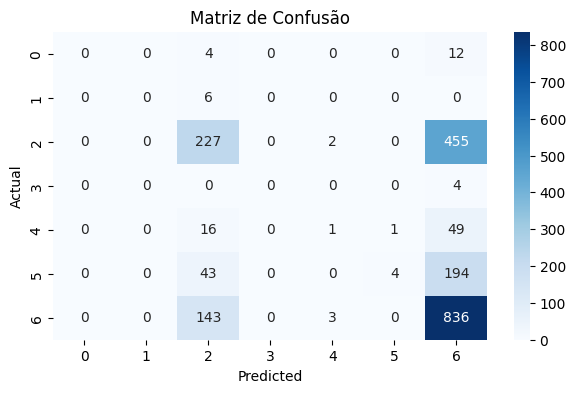

In [8]:
# Criação e treinamento do classificador Categorical Naive Bayes
clf = CategoricalNB()
clf.fit(X_train, y_train)

# Predição e avaliação do modelo
y_pred = clf.predict(X_test)

# Avaliação do modelo
print("Matriz de Confusão:\n\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nRelatório de Classificação:\n\n")
print(classification_report(y_test, y_pred))
print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))

# Visualização da matriz de confusão
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()